## Connect to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Unrar Dataset

In [ ]:
# !unrar x "/content/gdrive/MyDrive/mangroove/Pengelompokan.rar" "/content/gdrive/MyDrive/mangroove/"

## Konfigurasi PYTHHONPATH environtment variable

In [ ]:
!pip install -U numpy==1.19.5

     |████████████████████████████████| 14.8 MB 14.0 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip uninstall -y pycocotools
!pip install --no-cache-dir pycocotools

Found existing installation: pycocotools 2.0.4
Uninstalling pycocotools-2.0.4:
  Successfully uninstalled pycocotools-2.0.4
     |████████████████████████████████| 106 kB 15.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycocotools: filename=pycocotools-2.0.4-cp37-cp37m-linux_x86_64.whl size=265208 sha256=159595bc959ae021ea58294dc93b25db704ae55c752129c5d0b8b8479fa6a5ae
  Stored in directory: /tmp/pip-ephem-wheel-cache-vhu9cfc1/wheels/a3/5f/fa/f011e578cc76e1fc5be8dce30b3eb9fd00f337e744b3bba59b
Successfully built pycocotools


In [ ]:
!pip install lvis

In [ ]:
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==1.13.1

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0
     |████████████████████████████████| 345.0 MB 3.9 kB/s 
     |████████████████████████████████| 3.2 MB 64.8 MB/s 
     |████████████████████████████████| 367 kB 65.3 MB/s 
     |████████████████████████████████| 50 kB 8.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0


In [ ]:
import tensorflow as tf
print(tf.__version__)

1.13.1


## Build file protobuff

In [ ]:
%cd /content/gdrive/MyDrive/tensorflow2/models/research/
!protoc object_detection/protos/*.proto --python_out=.

/content/gdrive/MyDrive/tensorflow2/models/research


In [ ]:
import os
os.environ['PYTHONPATH'] += ":/content/gdrive/MyDrive/tensorflow2/models:/content/gdrive/MyDrive/tensorflow2/models/research:/content/gdrive/MyDrive/tensorflow2/models/research/slim"

In [ ]:
!python setup.py build
!python setup.py install

running build
running build_py
copying object_detection/protos/anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_predictor_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/argmax_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/eval_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/bipartite_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/hyperparams_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/grid_anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/image_resizer_pb2.py -> build/

## Quick Test

In [ ]:
!python /content/gdrive/MyDrive/tensorflow2/models/research/object_detection/builders/model_builder_test.py

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## Import Library

In [ ]:
import glob
import pandas as pd
import xml.etree.ElementTree as ET

## Convert xml to csv

In [ ]:
%cd /content/gdrive/MyDrive/mangroove

/content/gdrive/MyDrive/mangroove


In [ ]:
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [ ]:
def main():
    for folder in ['train','test']:
        image_path = os.path.join("/content/gdrive/MyDrive/tensorflow2/models/research/object_detection/", ('images/' + folder))
        xml_df = xml_to_csv(image_path)
        xml_df.to_csv(('/content/gdrive/MyDrive/tensorflow2/models/research/object_detection/images/' + folder + '_labels.csv'), index=None)
        print('Successfully converted xml to csv.')


main()

Successfully converted xml to csv.
Successfully converted xml to csv.


## Konversi Dataset

In [ ]:
%cd object_detection

/content/gdrive/MyDrive/tensorflow1/models/research/object_detection


In [ ]:
!python object_detection/generate_tfrecord.py --csv_input=object_detection/images/train_labels.csv --image_dir=object_detection/images/train --output_path=object_detection/train.record

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [ ]:
!python object_detection/generate_tfrecord.py --csv_input=object_detection/images/test_labels.csv --image_dir=object_detection/images/test --output_path=object_detection/test.record

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## Training

In [ ]:
!python object_detection/train.py --logtostderr --train_dir=training/ --pipeline_config_path=pretrained_model/pipeline.config

Streaming output truncated to the last 5000 lines.
INFO:tensorflow:global step 45071: loss = 0.1394 (1.479 sec/step)
INFO:tensorflow:global step 45072: loss = 0.1663 (1.221 sec/step)
INFO:tensorflow:global step 45073: loss = 0.1492 (1.293 sec/step)
INFO:tensorflow:global step 45074: loss = 0.2598 (1.350 sec/step)
INFO:tensorflow:global step 45075: loss = 0.2284 (1.425 sec/step)
INFO:tensorflow:global step 45076: loss = 0.2960 (1.467 sec/step)
INFO:tensorflow:global step 45077: loss = 0.2547 (1.233 sec/step)
INFO:tensorflow:global step 45078: loss = 0.2458 (1.295 sec/step)
INFO:tensorflow:global step 45079: loss = 0.1284 (1.296 sec/step)
INFO:tensorflow:global step 45080: loss = 0.2809 (1.223 sec/step)
INFO:tensorflow:global step 45081: loss = 0.2785 (1.350 sec/step)
INFO:tensorflow:global step 45082: loss = 0.2217 (1.235 sec/step)
INFO:tensorflow:global step 45083: loss = 0.1678 (1.279 sec/step)
INFO:tensorflow:global step 45084: loss = 0.1908 (1.241 sec/step)
INFO:tensorflow:global st

## Calculating metrics 

In [ ]:
%load_ext tensorboard.notebook

In [ ]:
%tensorboard --logdir=/content/gdrive/MyDrive/tensorflow2/models/research/training

In [ ]:
!kill 2775

## Fine tuned model

In [ ]:
import re
import numpy as np

output_directory = './fine_tuned_model'
model_dir = '/content/gdrive/MyDrive/tensorflow2/models/research/training'

lst = os.listdir(model_dir)
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')

last_model_path = os.path.join(model_dir, last_model)
print(last_model_path)

!python object_detection/export_inference_graph.py --input_type=image_tensor --pipeline_config_path=pretrained_model/pipeline.config --trained_checkpoint_prefix={last_model_path} --output_directory={output_directory}

/content/gdrive/MyDrive/tensorflow2/models/research/training/model.ckpt-50000
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/t

In [ ]:
%cd /content/gdrive/MyDrive/tensorflow2/models/research/object_detection

import numpy as np
import os 
import glob
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import pandas as pd

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops


# This is needed to display the images.
%matplotlib inline


from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = "/content/gdrive/MyDrive/tensorflow2/models/research/fine_tuned_model_3/frozen_inference_graph.pb"

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = "/content/gdrive/MyDrive/tensorflow2/models/research/object_detection/training/labelmap.pbtxt"

# If you want to test the code with your images, just add images files to the PATH_TO_TEST_IMAGES_DIR.
PATH_TO_TEST_IMAGES_DIR =  "/content/gdrive/MyDrive/tensorflow2/models/research/object_detection/images_1/test"

TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.*"))

num_classes = 3

/content/gdrive/MyDrive/tensorflow2/models/research/object_detection


In [ ]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict

In [ ]:
# Output images not showing? Run this cell again, and try the cell above
# This is needed to display the images.
%matplotlib inline

m_setengah (323).jpg
m_setengah (322).jpg
m_matang (324).jpg
m_matang (323).jpg
m_matang (321).jpg
m_mentah (323).jpg
m_mentah (324).jpg
m_mentah (321).jpg
m_mentah (322).jpg
m_setengah (324).jpg
m_setengah (321).jpg
m_matang (322).jpg


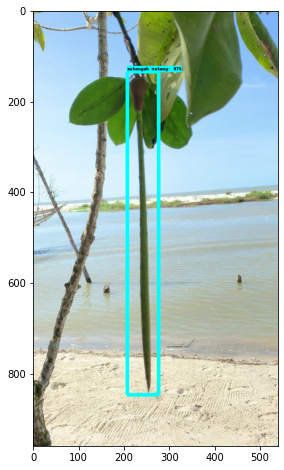

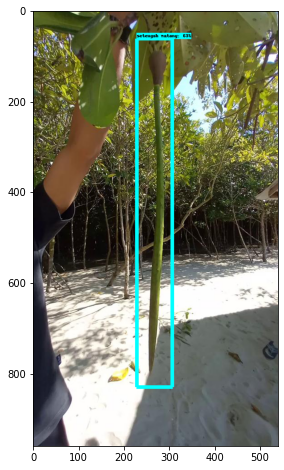

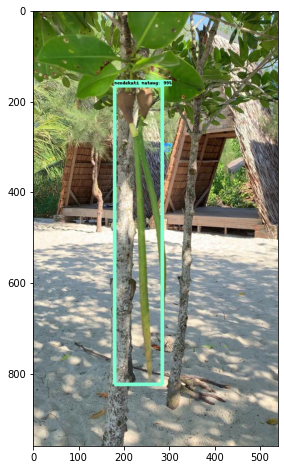

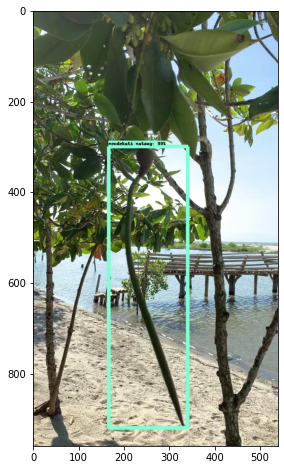

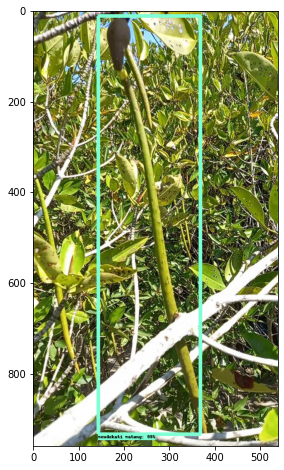

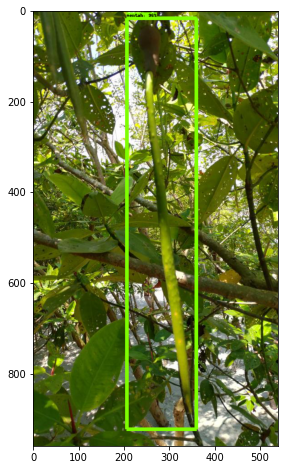

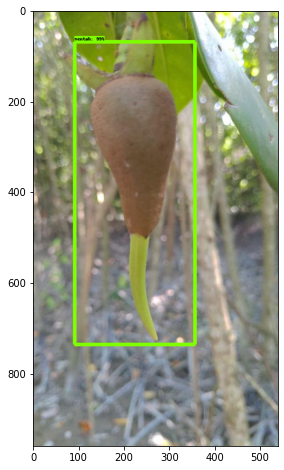

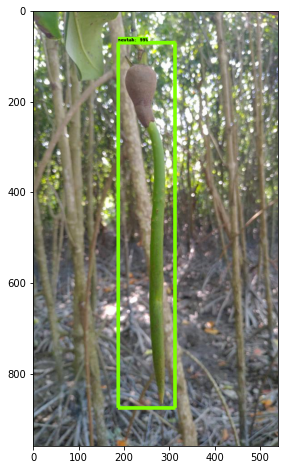

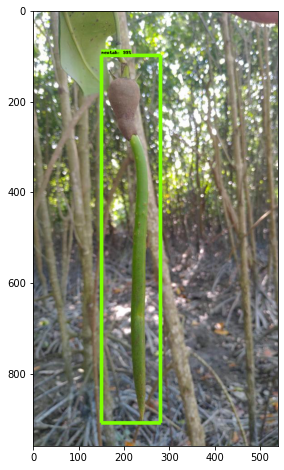

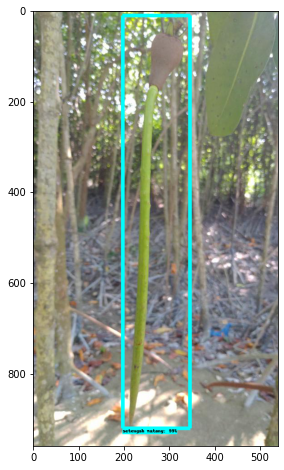

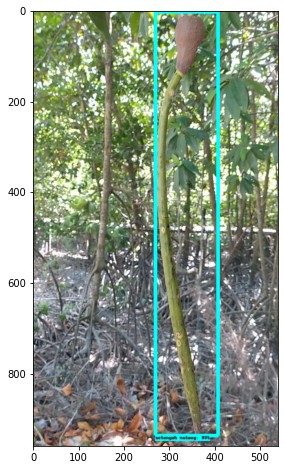

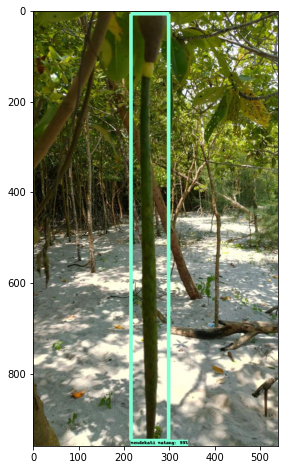

In [ ]:
prediction_result = []
test_pred = pd.DataFrame()
labels = ['mentah', 'setengah matang', 'mendekati matang']
for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    (im_width, im_height) = image.size
    image_np = load_image_into_numpy_array(image)
    filename = image_path.split("/")[-1]
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    num_detections = int(output_dict.pop('num_detections'))
    detections = {key: value[slice(0, num_detections)] for key, value in output_dict.items()}
    prediction_result.append(detections)
    print(filename)
    for i in range(num_detections):
      ll = []
      ll.append(filename)
      ll.append(im_width)
      ll.append(im_height)
      ll.append(detections['detection_boxes'][i].tolist())
      ll.append(labels[int(detections['detection_classes'][i])-1])
      ll.append(detections['detection_scores'][i])

      pre_df = pd.DataFrame([{'filename': ll[0],
                              'width': ll[1],
                              'height': ll[2],
                              'class': ll[4],
                              'xmin': int(ll[3][1] * im_width),
                              'ymin': int(ll[3][0] * im_height),
                              'xmax': int(ll[3][3] * im_width),
                              'ymax': int(ll[3][2] * im_height),
                              'score': ll[5]
                              }])
      test_pred = pd.concat([test_pred, pre_df], axis=0)

    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)

In [ ]:
test_pred.to_csv("test_pred.csv",index=False)

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 14 21:42:19 2020
@author: sujith
"""
import pandas as pd
import numpy as np
test = pd.read_csv('/content/gdrive/MyDrive/tensorflow2/models/research/object_detection/images_1/test_labels.csv')
pred = pd.read_csv('/content/gdrive/MyDrive/tensorflow2/models/research/object_detection/test_pred.csv')
test['filename'] = test['filename'].apply(lambda x : x.split('/')[-1])
pred['filename'] = pred['filename'].apply(lambda x : x.split('/')[-1])
label_map = "/content/gdrive/MyDrive/tensorflow2/models/research/object_detection/label.txt"
output_path = "/content/gdrive/MyDrive/tensorflow2/models/research/object_detection/confusion_matrix.csv"
with open(label_map, 'r') as f:
    category = f.read().replace("\n", " ")
category = '{"mentah": 1, "mendekati matang": 2, "setengah matang": 3}'
import json
categories = json.loads(category)
    
    
IOU_THRESHOLD = 0.5
CONFIDENCE_THRESHOLD = 0.5
def compute_iou(groundtruth_box, detection_box):
    g_xmin, g_ymin, g_xmax, g_ymax = tuple(groundtruth_box)
    d_xmin, d_ymin, d_xmax, d_ymax = tuple(detection_box)
    
    xa = max(g_xmin, d_xmin)
    ya = max(g_ymin, d_ymin)
    xb = min(g_xmax, d_xmax)
    yb = min(g_ymax, d_ymax)
    intersection = max(0, xb - xa + 1) * max(0, yb - ya + 1)
    boxAArea = (g_xmax - g_xmin + 1) * (g_ymax - g_ymin + 1)
    boxBArea = (d_xmax - d_xmin + 1) * (d_ymax - d_ymin + 1)

    return intersection / float(boxAArea + boxBArea - intersection)

def process_detections(test,categories):
    confusion_matrix = np.zeros(shape=(len(categories) + 1, len(categories) + 1))
    file_unique = test['filename'].unique()
    for file in file_unique:
            print(file)
            test_df = test[test['filename']==file]
            test_df.reset_index(inplace = True, drop = True) 
            pred_df = pred[pred['filename']==file]
            pred_df.reset_index(inplace = True, drop = True) 
            
            pred_class = pred_df[pred_df['score'] >= CONFIDENCE_THRESHOLD ]
            

            
            groundtruth_boxes = test_df[['xmin','ymin','xmax','ymax']].values.tolist()
            detection_boxes = pred_class[['xmin','ymin','xmax','ymax']].values.tolist()
            # print(groundtruth_boxes)
            # print(detection_boxes)
            matches = []   
            
            for i in range(len(groundtruth_boxes)):
                for j in range(len(detection_boxes)):
                    iou = compute_iou(groundtruth_boxes[i], detection_boxes[j])
            
                    if iou > IOU_THRESHOLD:
                        matches.append([i, j, iou])
            
            
            matches = np.array(matches)
            #matches_df = pd.DataFrame(matches)
            print(matches)
            
            
            if matches.shape[0] > 0:
                # Sort list of matches by descending IOU so we can remove duplicate detections
                # while keeping the highest IOU entry.
                matches = matches[matches[:, 2].argsort()[::-1][:len(matches)]]
                
                # Remove duplicate detections from the list.
                matches = matches[np.unique(matches[:,1], return_index=True)[1]]
                
                # Sort the list again by descending IOU. Removing duplicates doesn't preserve
                # our previous sort.
                matches = matches[matches[:, 2].argsort()[::-1][:len(matches)]]
                
                # Remove duplicate ground truths from the list.
                matches = matches[np.unique(matches[:,0], return_index=True)[1]]
            
            
            for i in range(len(groundtruth_boxes)):
                print(i)
                if matches.shape[0] > 0 and matches[matches[:,0] == i].shape[0] == 1:
                    print("inside : ",i)
                    confusion_matrix[categories[test_df['class'][i]] - 1][categories[pred_class['class'][matches[matches[:,0] == i].tolist()[0][1]]] - 1] += 1
                else:
                    confusion_matrix[categories[test_df['class'][i]] - 1][confusion_matrix.shape[1] - 1] += 1
    
            for i in range(len(detection_boxes)):
               if matches.shape[0] > 0 and matches[matches[:,1] == i].shape[0] == 0:
                    confusion_matrix[confusion_matrix.shape[0] - 1][categories[pred_class['class'][i]] - 1] += 1
                
    return confusion_matrix


def display(confusion_matrix, test, categories, output_path):
    results = []
    class_uniq = test['class'].unique()
    for label in class_uniq:
        class_id = int(float(categories[label]))-1
        name = label
        
        total_target = np.sum(confusion_matrix[class_id,:])
        total_predicted = np.sum(confusion_matrix[:,class_id])
        
        precision = float(confusion_matrix[class_id, class_id] / total_predicted)
        recall = float(confusion_matrix[class_id, class_id] / total_target)
    
        results.append({'category' : name, 'precision_@{}IOU'.format(IOU_THRESHOLD) : precision, 'recall_@{}IOU'.format(IOU_THRESHOLD) : recall})
    print(confusion_matrix)
    print(precision)
    print(recall)
    df = pd.DataFrame(results)
    print(df)
    df.to_csv(output_path)


if __name__ == '__main__':
    confusion_matrix = process_detections(test,categories)
    display(confusion_matrix, test, categories, output_path)

m_mentah (324).jpg
[[0.         0.         0.80008521]]
0
inside :  0
m_mentah (325).jpg
[[0.         0.         0.84697199]
 [0.         1.         0.52178604]]
0
inside :  0
m_mentah (326).jpg
[[0.         0.         0.76641863]]
0
inside :  0
m_mentah (327).jpg
[[0.         0.         0.89826601]]
0
inside :  0
m_mentah (329).jpg
[[0.         0.         0.85581559]]
0
inside :  0
m_mentah (334).jpg
[[0.         0.         0.87346025]]
0
inside :  0
m_mentah (339).jpg
[[0.         0.         0.77493346]]
0
inside :  0
m_mentah (341).jpg
[[0.         0.         0.82742209]]
0
inside :  0
m_mentah (344).jpg
[[0.         0.         0.78043943]
 [0.         1.         0.59398236]]
0
inside :  0
m_mentah (348).jpg
[]
0
m_mentah (357).jpg
[[0.         0.         0.72627386]]
0
inside :  0
m_mentah (358).jpg
[[0.         0.         0.86248004]]
0
inside :  0
m_mentah (359).jpg
[[0.         0.         0.92607121]]
0
inside :  0
m_mentah (362).jpg
[[0.         0.         0.76606833]]
0
inside